In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [140]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
train = pd.read_csv(r'C:\Users\Abhishek\Documents\Data analyst\Practical exam\Data Set for ML & R Practical Exam Paper_1979\trainLoanLogistic.csv')

In [8]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train.shape

(614, 13)

In [11]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
train['Loan_Status'].isnull().sum()

0

In [13]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
#Gender,Married,Self_Employed,Credit_History,Loan_Status

In [16]:
train['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

<AxesSubplot: >

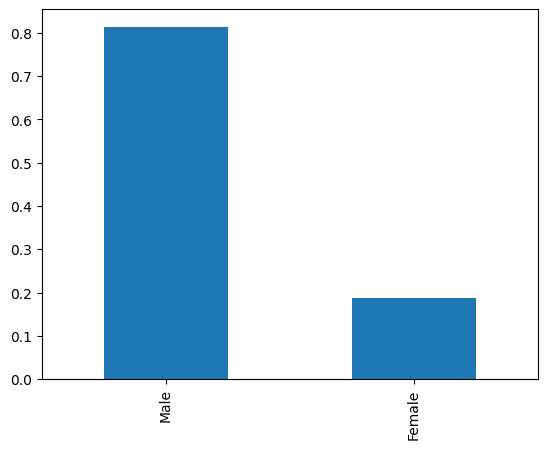

In [17]:
train['Gender'].value_counts(normalize=True).plot.bar()

In [18]:
train['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

<AxesSubplot: >

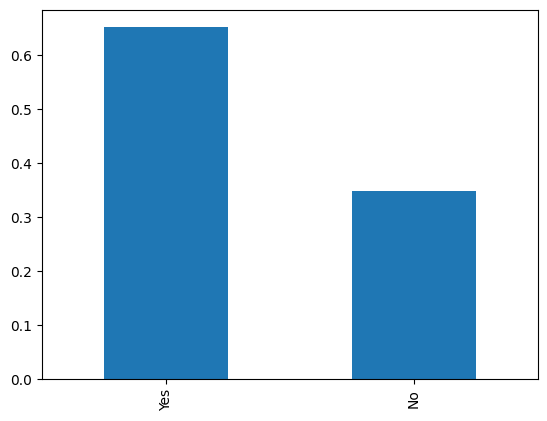

In [23]:
train['Married'].value_counts(normalize=True).plot.bar()

In [19]:
train['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

<AxesSubplot: >

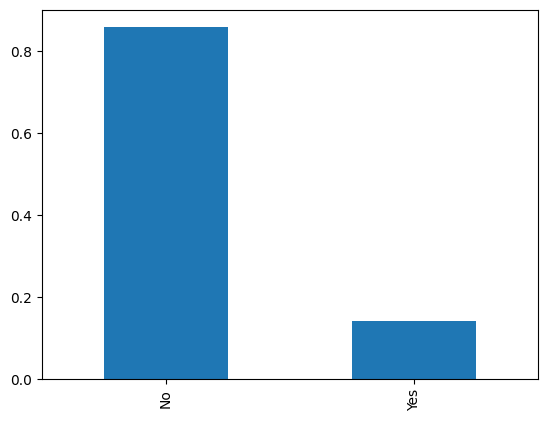

In [24]:
train['Self_Employed'].value_counts(normalize=True).plot.bar()

In [20]:
train['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

<AxesSubplot: >

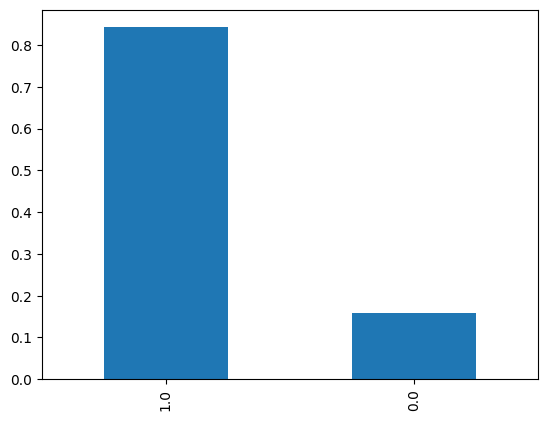

In [25]:
train['Credit_History'].value_counts(normalize=True).plot.bar()

In [21]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot: >

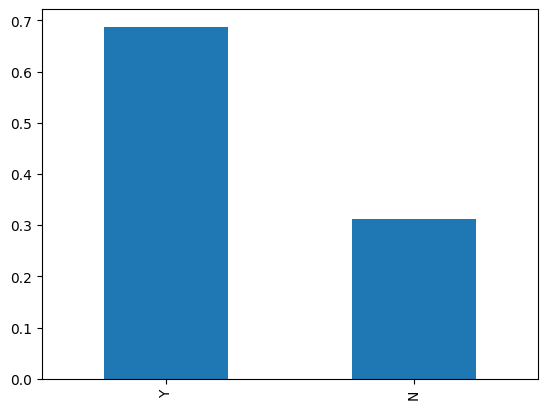

In [26]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

In [22]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
train['Education'].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

<AxesSubplot: >

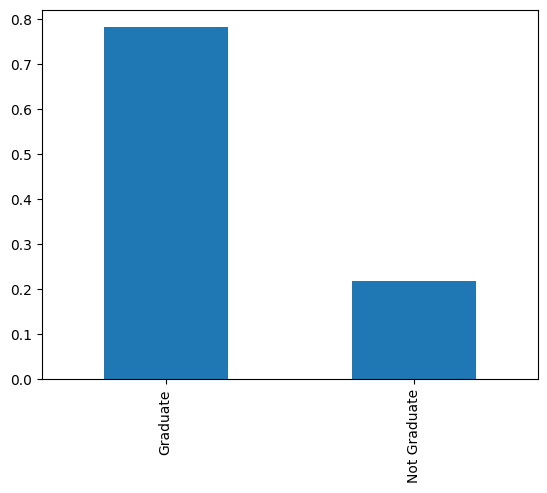

In [36]:
train['Education'].value_counts(normalize=True).plot.bar()

In [37]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [39]:
train['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

<AxesSubplot: >

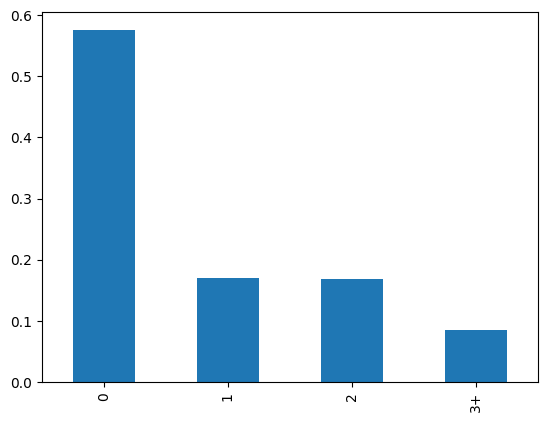

In [40]:
train['Dependents'].value_counts(normalize=True).plot.bar()

In [41]:
train['Property_Area'].value_counts(normalize=True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

<AxesSubplot: >

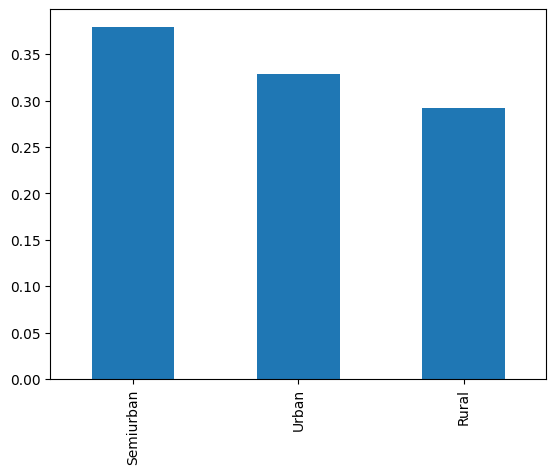

In [42]:
train['Property_Area'].value_counts(normalize=True).plot.bar()

In [43]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [45]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

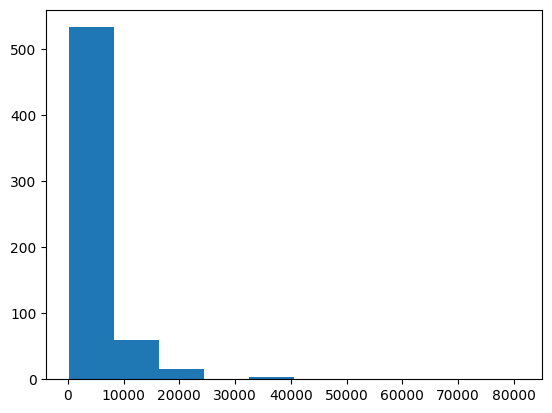

In [46]:
plt.hist(train.ApplicantIncome)
plt.show()

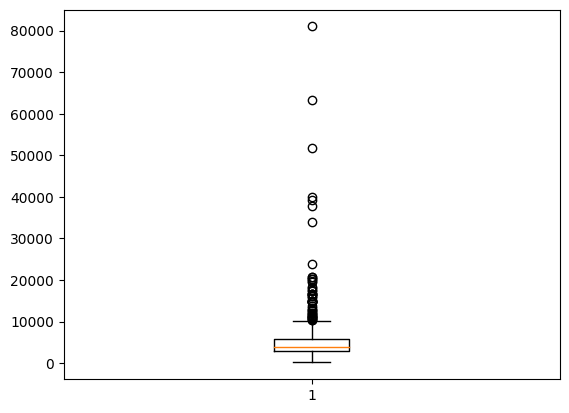

In [47]:
plt.boxplot(train.ApplicantIncome)
plt.show()

<AxesSubplot: xlabel='ApplicantIncome', ylabel='Density'>

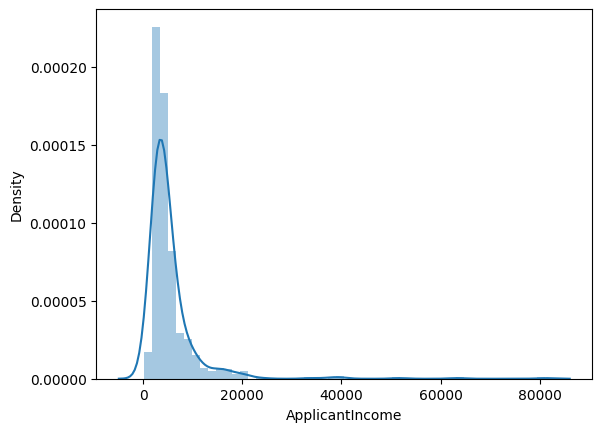

In [48]:
sns.distplot(train['ApplicantIncome'])

<AxesSubplot: xlabel='CoapplicantIncome', ylabel='Density'>

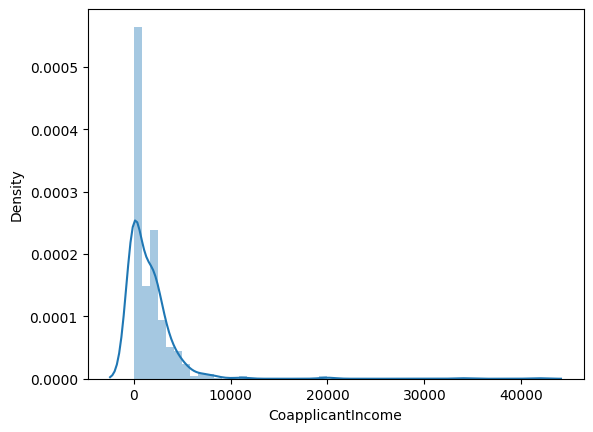

In [49]:
sns.distplot(train['CoapplicantIncome'])

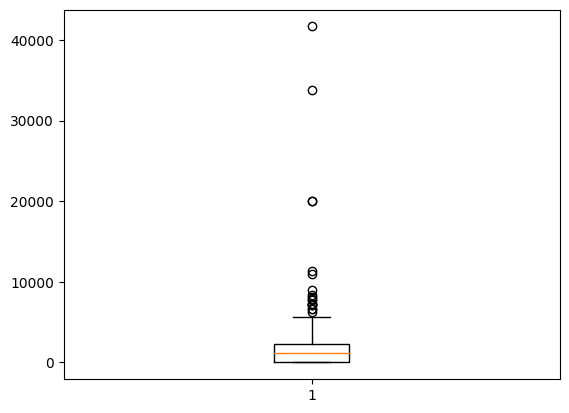

In [51]:
plt.boxplot(train.CoapplicantIncome)
plt.show()

<AxesSubplot: xlabel='LoanAmount', ylabel='Density'>

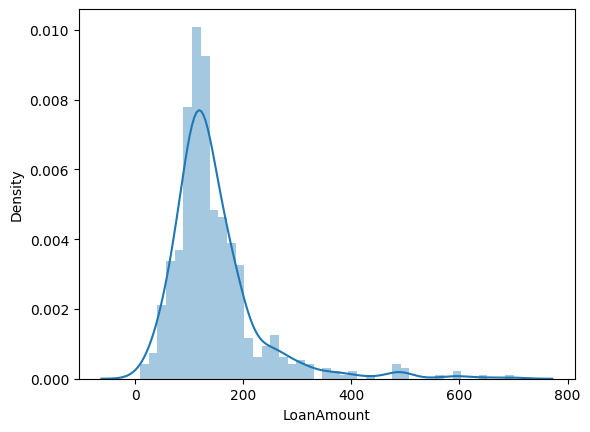

In [50]:
sns.distplot(train['LoanAmount'])

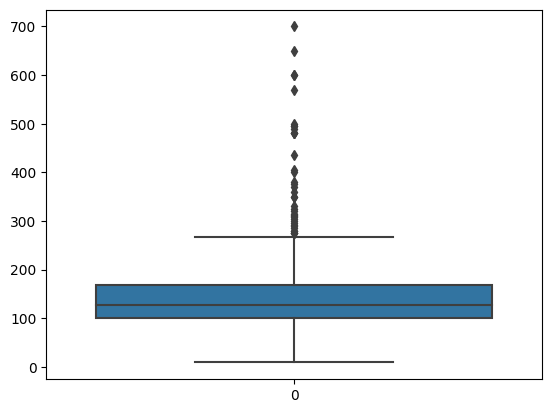

In [53]:
sns.boxplot(train.LoanAmount)
plt.show()

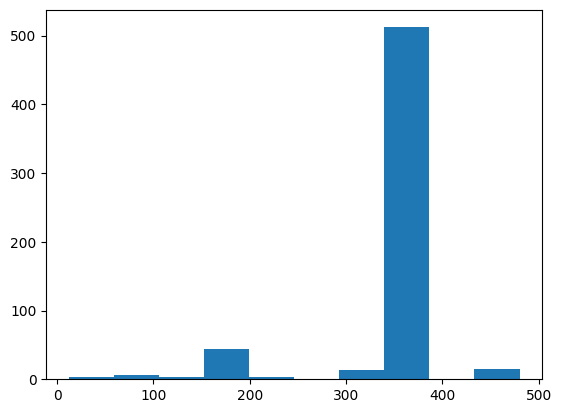

In [54]:
plt.hist(train.Loan_Amount_Term)
plt.show()

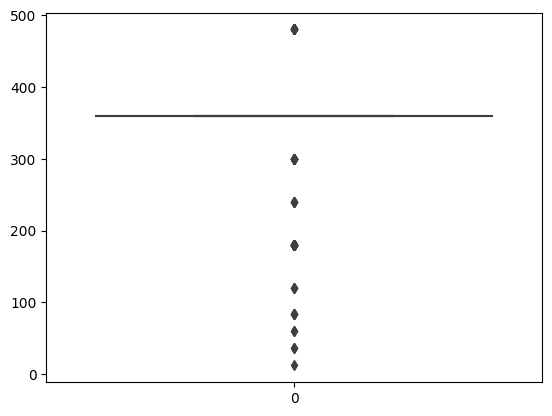

In [56]:
sns.boxplot(train.Loan_Amount_Term)
plt.show()

In [57]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])

In [59]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [60]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot: xlabel='Gender'>

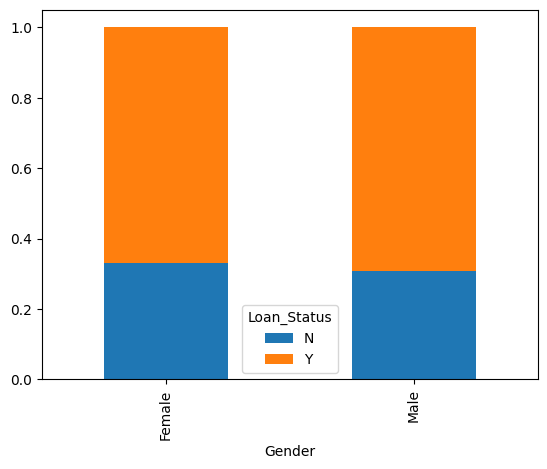

In [61]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<AxesSubplot: xlabel='Married'>

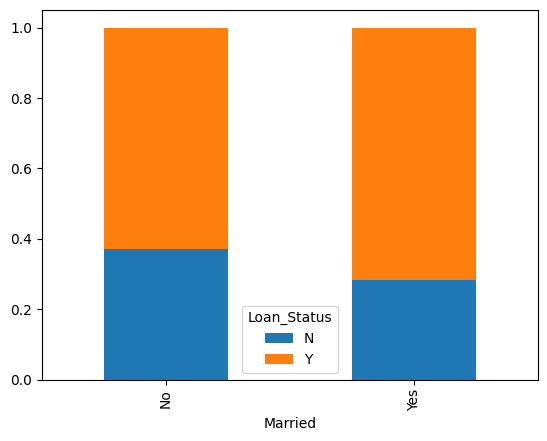

In [63]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<AxesSubplot: xlabel='Dependents'>

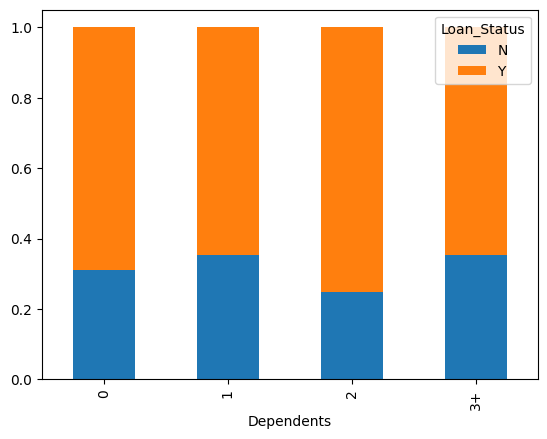

In [64]:
Dependents= pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [65]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<AxesSubplot: xlabel='Education'>

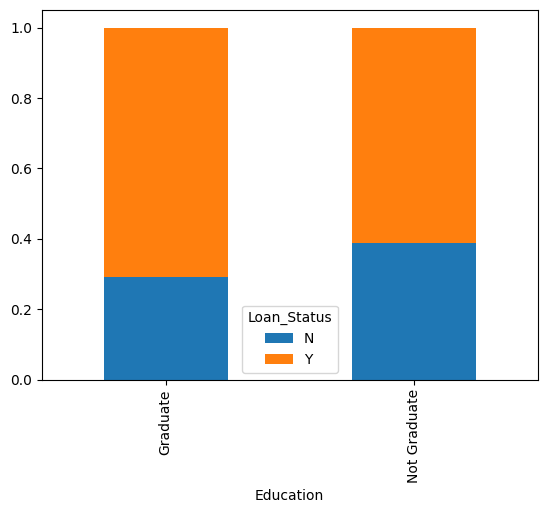

In [66]:
Education= pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<AxesSubplot: xlabel='Self_Employed'>

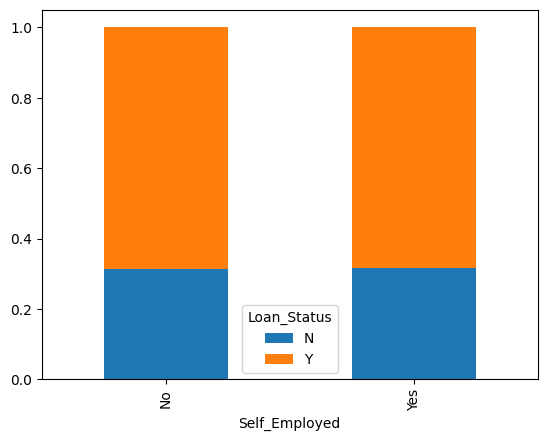

In [67]:
Self_Employed= pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<AxesSubplot: xlabel='Property_Area'>

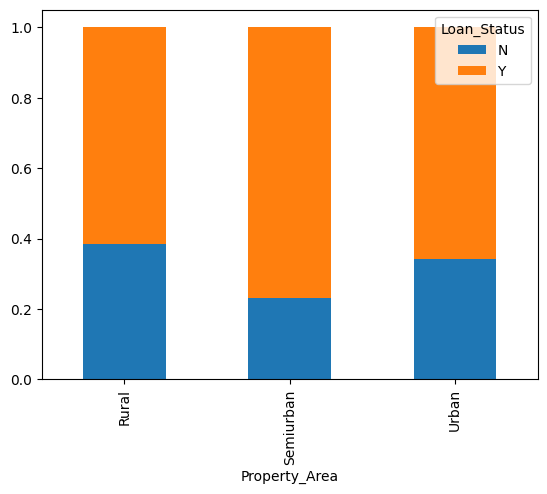

In [68]:
Property_Area= pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [69]:
train.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

<AxesSubplot: xlabel='Loan_Status'>

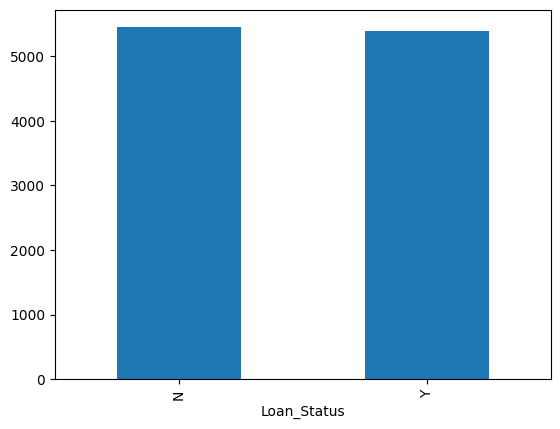

In [71]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

<AxesSubplot: xlabel='Loan_Status'>

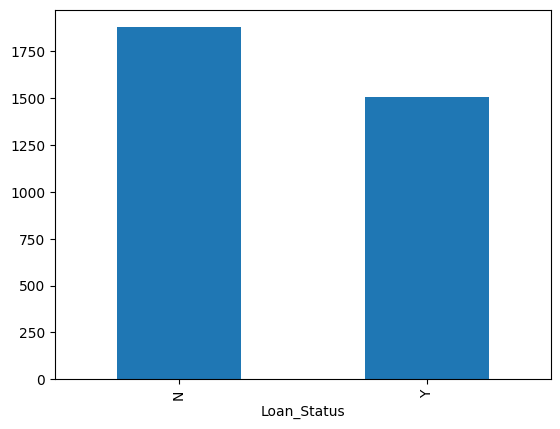

In [73]:
train.groupby('Loan_Status')['CoapplicantIncome'].mean()
train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

In [74]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [75]:
bucket01 = [0,2500,4000,6000,81000]
group01 = ['low','average','high','very high']

train['IncomeBin'] = pd.cut(train['ApplicantIncome'],bucket01, labels = group01)

In [76]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,IncomeBin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,high
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,high


<AxesSubplot: xlabel='IncomeBin'>

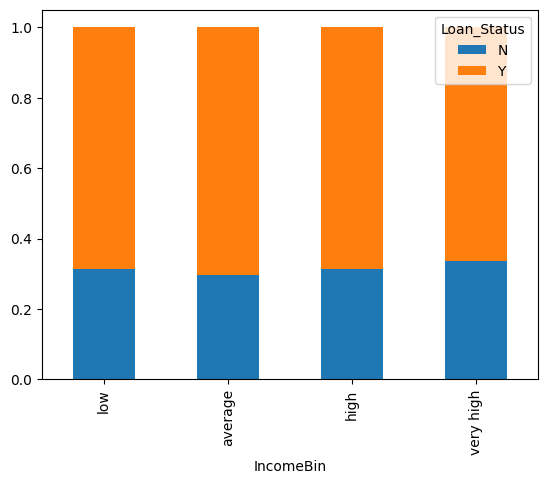

In [77]:
IncomeBin= pd.crosstab(train['IncomeBin'],train['Loan_Status'])
IncomeBin.div(IncomeBin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [78]:
train['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [79]:
bucket02 = [0,1000,3000,4200]
group02 = ['low','average','high']

train['CoapplicantIncomeBin'] = pd.cut(train['CoapplicantIncome'],bucket02, labels = group02)

In [80]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,IncomeBin,CoapplicantIncomeBin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,high,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,high,average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,average,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,average,average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,high,NaN


<AxesSubplot: xlabel='CoapplicantIncomeBin'>

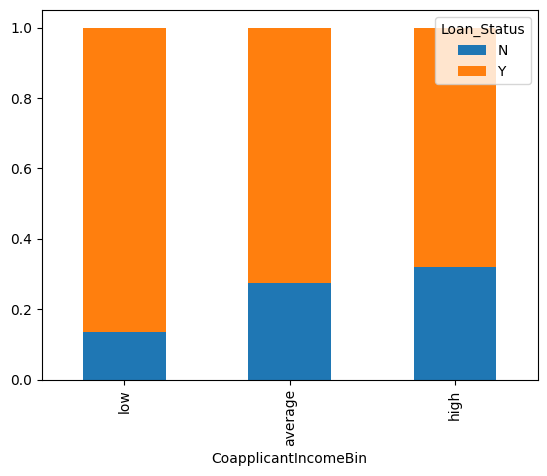

In [81]:
CoapplicantIncomeBin= pd.crosstab(train['CoapplicantIncomeBin'],train['Loan_Status'])
CoapplicantIncomeBin.div(CoapplicantIncomeBin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [84]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [86]:
train['Total_Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64

In [89]:
bucket03 = [0,2500,4000,6000,81000]
group03 = ['low','average','high','very high']

train['Total_IncomeBin'] = pd.cut(train['Total_Income'],bucket03, labels = group03)

<AxesSubplot: xlabel='Total_IncomeBin'>

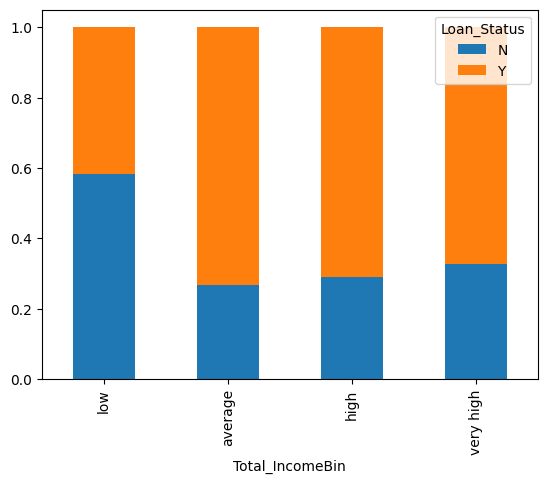

In [90]:
Total_IncomeBin= pd.crosstab(train['Total_IncomeBin'],train['Loan_Status'])
Total_IncomeBin.div(Total_IncomeBin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [92]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [93]:
bucket04 = [0,100,200,700]
group04 = ['low','average','high']

train['LoanAmountBin'] = pd.cut(train['LoanAmount'],bucket04, labels = group04)

<AxesSubplot: xlabel='LoanAmountBin'>

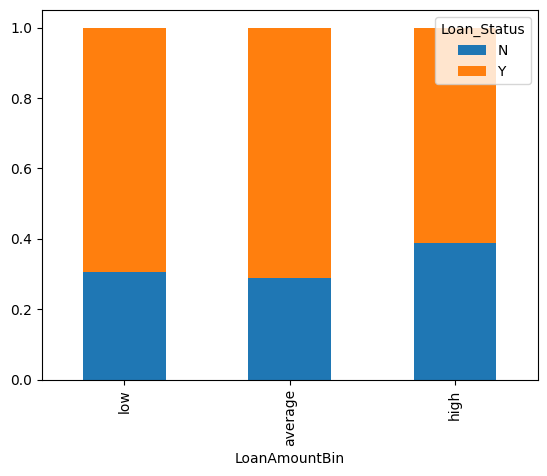

In [94]:
LoanAmountBin= pd.crosstab(train['LoanAmountBin'],train['Loan_Status'])
LoanAmountBin.div(LoanAmountBin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [95]:
train.dtypes

Loan_ID                   object
Gender                    object
Married                   object
Dependents                object
Education                 object
Self_Employed             object
ApplicantIncome            int64
CoapplicantIncome        float64
LoanAmount               float64
Loan_Amount_Term         float64
Credit_History           float64
Property_Area             object
Loan_Status               object
IncomeBin               category
CoapplicantIncomeBin    category
Total_Income             float64
Total_IncomeBin         category
LoanAmountBin           category
dtype: object

In [97]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [100]:
train['Dependents'].replace('3+',3,inplace=True)
train['Dependents'].replace('0',0,inplace=True)
train['Dependents'].replace('2',2,inplace=True)
train['Dependents'].replace('1',1,inplace=True)

In [101]:
train.dtypes

Loan_ID                   object
Gender                    object
Married                   object
Dependents               float64
Education                 object
Self_Employed             object
ApplicantIncome            int64
CoapplicantIncome        float64
LoanAmount               float64
Loan_Amount_Term         float64
Credit_History           float64
Property_Area             object
Loan_Status               object
IncomeBin               category
CoapplicantIncomeBin    category
Total_Income             float64
Total_IncomeBin         category
LoanAmountBin           category
dtype: object

In [103]:
train = train.drop(['IncomeBin','CoapplicantIncomeBin','Total_IncomeBin','LoanAmountBin','Total_Income'], axis=1)

In [105]:
train.shape

(614, 13)

In [106]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [107]:
train[train['Gender'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2.0,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3.0,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3.0,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0.0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0.0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1.0,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0.0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0.0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2.0,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0.0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [108]:
train['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [109]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace =True)

In [111]:
train['Gender'].isnull().sum()

0

In [112]:
train['Married'].fillna(train['Married'].mode()[0], inplace =True)

In [113]:
train['Married'].isnull().sum()

0

In [114]:
train['Dependents'].mode()

0    0.0
Name: Dependents, dtype: float64

In [115]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace =True)

In [116]:
train['Dependents'].isnull().sum()

0

In [117]:
train['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [118]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace =True)

In [120]:
train['Self_Employed'].isnull().sum()

0

In [121]:
train['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [122]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace =True)

In [123]:
train['Credit_History'].isnull().sum()

0

In [124]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [125]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [126]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [127]:
train['LoanAmount'].mode()

0    120.0
Name: LoanAmount, dtype: float64

In [128]:
train['LoanAmount'].median()

128.0

In [130]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace =True)

In [131]:
train['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [132]:
train['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [133]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace =True)

In [134]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [135]:
train = train.drop('Loan_ID',axis=1)

In [136]:
train.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [137]:
x = train.drop('Loan_Status',1)
y = train.Loan_Status

In [138]:
x = pd.get_dummies(x, drop_first=True)
train = pd.get_dummies(train, drop_first=True)

In [141]:
x_train, x_cv, y_train, y_cv = train_test_split (x,y, test_size = 0.3)

In [142]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [143]:
x_train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [145]:
model.intercept_, model.coef_

(array([0.17050767]),
 array([[-1.19566664e-01,  4.22456577e-06, -4.13076034e-05,
         -1.04983764e-03, -4.27967478e-03,  2.59676739e+00,
         -1.14993059e-01,  4.16994425e-01, -3.56404051e-01,
         -1.69996399e-01,  7.62719063e-01, -1.17884944e-01]]))

In [146]:
pred_cv = model.predict(x_train)

In [147]:
accuracy_score(y_train, pred_cv)

0.8065268065268065